### This code reads the lammps log file and plots the data in subplots.

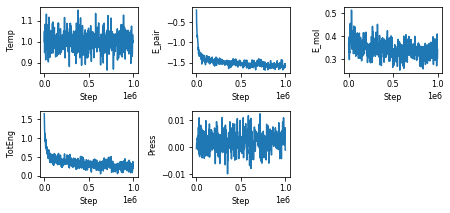

In [2]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SMALL  = 8
MEDIUM = 8
BIGGER = 10
plt.rc('font', size=SMALL)  
plt.rc('axes', titlesize=SMALL)     
plt.rc('axes', labelsize=SMALL)    
plt.rc('xtick', labelsize=SMALL)    
plt.rc('ytick', labelsize=SMALL)    
plt.rc('legend', fontsize=SMALL)    
plt.rc('figure', titlesize=BIGGER)  

##############################################################################################################
def extract(logfilename, key1, key2):
    '''the input of the function 'extract' is name of logfile: logfilename, keyword where to start taking data:
    key1, keyword where to stop: key2. The function returns the datacolumns from the log.lammps with an additional
    row having name of the quantity.
    '''
    #open the log file generated by LAMMPS package of whose you want to plot.
    f = open(logfilename,"r")

    #lines has all the data of the log file in format of a list of length of lines of the files.
    lines = f.readlines()
    f.close()
    #print(len(lines))

    #here the empty lines are removed from the log file data. New data without blank lines is saved in a list x.
    x = []
    for line in lines:
        if line.strip(): #line.strip is True if there is something in the line and False for blank line. 
            x.append(line)
    #print(len(x))

    count = 0
    for i in range(len(x)):
        if (x[i].split()[0] ==key1):          #it finds the keyword 'Step' in the file and gets the line number.
            count+=1
            countkey1=count-1
        elif (x[i].split()[0] ==key2):        #x[i].split() is a list of strings.
            count+=1
            countkey2=count                     #it finds the keyword 'Step' in the file and gets the line number.
        else:
            count+=1
            pass

    datacolumns = []       
    for i in range(countkey1,countkey2-1):
        datacolumns.append(x[i])        
    return datacolumns                   #datacolumns has an additional row which has variable names also.
###############################################################################################################

def plots(nrow,nsubplot,outfile,ncol=5):
    '''This function 'plots' take nrow, ncol, nsubplot, outfile as input and saves a plot 
    having multiple subplots.
    nrow: number of rows in plot, ncol: number of columns in plot, nsubplot: number of subplots, 
    outfile: outfilename
    '''
    fig = plt.figure(figsize = (2.1*ncol,1.5*nrow))
    for i in range(nsubplot):
        ax = fig.add_subplot(nrow,ncol,i+1)
        ax.plot(var[0],var[i+1])
        ax.set_xlabel(variablename[0])
        ax.set_ylabel(variablename[i+1])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.savefig(outfile, dpi=100, quality=50, optimize=True, progressive=True)
    plt.show()
##############################################################################################################

data = extract('log.lammps', 'Step', 'Loop')

numcols = len(data[0].split())          #number of data columns.
variablename = []                       #the variablename is a list which holds the name of variables eg step, en
for i in range(numcols):
    variablename.append(data[0].split()[i])
    
var = [[] for i in range(len(data[0].split()))] #creating list of empty lists to store values of data columns.

for j in range(0,numcols):
    for i in range(1,len(data)):
        var[j].append(float(data[i].split()[j]))

plots(2,5,'plot_loglammps.jpg',3)